In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
! pip install pycaret
! pip install lightgbm

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from google.colab import files
!pwd
import os
import re
import regex
import nltk
from nltk.stem import PorterStemmer #Textual data cleaning
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams.update({'figure.max_open_warning': 0})
import pylab
from mpl_toolkits.mplot3d import Axes3D # 3D visualization
from matplotlib import pyplot
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage
from sklearn.feature_extraction import text 
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB # Naive Bayes model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import seaborn as sns
from pandas_profiling import ProfileReport # This library is great for seeing what is missing and what needs to be cleaned up
from bokeh.plotting import output_notebook, figure, show #graph
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


#graph
from bokeh.plotting import output_notebook, figure, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource

%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage

from matplotlib import pyplot as plt
# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

from collections import Counter


from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display
from sklearn import linear_model, metrics
from sklearn import naive_bayes
from sklearn import neural_network
from sklearn import ensemble
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

/content
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
twitter_data = files.upload()
data = pd.read_csv("gender-classifier-DFE-791531.csv", encoding='latin-1')


Saving gender-classifier-DFE-791531.csv to gender-classifier-DFE-791531.csv


In [ ]:
data.shape

(20050, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [ ]:
#notebook_path = os.path.abspath("Notebook.ipynb")
#train_csv = os.path.join(os.path.dirname(notebook_path), "gender-classifier-DFE-791531.csv")
#Upload the data set here which is downloaded from the link (https://www.kaggle.com/crowdflower/twitter-user-gender-classification?select=gender-classifier-DFE-791531.csv)
#train_csv = files.upload()
#print(train_csv)


# **Features of the dataset**

In [ ]:
data.keys()

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

# **Null values in the dataset**

In [ ]:
data.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

# **Drop unnecessary columns/features**

In [ ]:
data.drop (columns = ['_unit_id',
                      '_last_judgment_at',
                      'user_timezone',
                      'tweet_coord',
                      'tweet_created', 
                      'tweet_id',
                      'tweet_location',
                      'profileimage',
                      'created',
                      'name'], inplace = True)

data.info()


In [ ]:
data.describe()


_trusted_judgments  gender:confidence  ...  retweet_count   tweet_count
count        20050.000000       20024.000000  ...   20050.000000  2.005000e+04
mean             3.615711           0.882756  ...       0.079401  3.892469e+04
std             12.331890           0.191403  ...       2.649751  1.168371e+05
min              3.000000           0.000000  ...       0.000000  1.000000e+00
25%              3.000000           0.677800  ...       0.000000  2.398000e+03
50%              3.000000           1.000000  ...       0.000000  1.144150e+04
75%              3.000000           1.000000  ...       0.000000  4.002750e+04
max            274.000000           1.000000  ...     330.000000  2.680199e+06

[8 rows x 6 columns]

In [ ]:
# null values
data.isnull().sum()

_golden                      0
_unit_state                  0
_trusted_judgments           0
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
profile_yn_gold          20000
retweet_count                0
sidebar_color                0
text                         0
tweet_count                  0
dtype: int64

# **Exploring target variable**

In [ ]:
data['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

# **Getting rid of unknown gender rows**

In [ ]:
unknown_items_idx = data[data['gender'] == 'unknown'].index
data.drop (index = unknown_items_idx, inplace = True)
data['gender'].value_counts()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

# **“profile_yn”**

In [ ]:
print('Profile_yn information:\n',data['profile_yn'].value_counts())
print('-'*40)
print('Number of NaN instances when profile_yn is No: ', data[data['profile_yn'] == 'no']['gender'].isnull().sum())


Profile_yn information:
 yes    18836
no        97
Name: profile_yn, dtype: int64
----------------------------------------
Number of NaN instances when profile_yn is No:  97


# **Getting rid of rows where profile_yn is no**

In [ ]:
drop_items_idx = data[data['profile_yn'] == 'no'].index
data.drop (index = drop_items_idx, inplace = True)
data.drop (columns = ['profile_yn','profile_yn:confidence','profile_yn_gold'], inplace = True)

# Getting rid of data rows where target label confidence is lesser than 100%

In [ ]:
print ('Full data items: ', data.shape)
print ('Data with label-confidence < 100%: ', data[data['gender:confidence'] < 1].shape)

Full data items:  (18836, 13)
Data with label-confidence < 100%:  (5032, 13)


In [ ]:
# drop_items_idx = data[data['gender:confidence'] < 1].index
# data.drop (index = drop_items_idx, inplace = True)
# data.drop (columns = ['gender:confidence'], inplace = True)
data.drop (columns = ['_golden','_unit_state','_trusted_judgments','gender_gold'], inplace = True)

In [ ]:
# Double check the data 
print (data['gender'].value_counts())
print ('-'*40)
data.info()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20049
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             18836 non-null  object 
 1   gender:confidence  18836 non-null  float64
 2   description        15522 non-null  object 
 3   fav_number         18836 non-null  int64  
 4   link_color         18836 non-null  object 
 5   retweet_count      18836 non-null  int64  
 6   sidebar_color      18836 non-null  object 
 7   text               18836 non-null  object 
 8   tweet_count        18836 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [ ]:
data.describe()


gender:confidence     fav_number  retweet_count   tweet_count
count       18836.000000   18836.000000   18836.000000  1.883600e+04
mean            0.900997    4413.461563       0.082502  3.913570e+04
std             0.172980   12468.532705       2.732317  1.191306e+05
min             0.314000       0.000000       0.000000  1.000000e+00
25%             0.686475      13.000000       0.000000  2.399750e+03
50%             1.000000     482.500000       0.000000  1.131250e+04
75%             1.000000    3375.500000       0.000000  3.979350e+04
max             1.000000  341621.000000     330.000000  2.680199e+06

In [ ]:
data.head(3)

gender  ...  tweet_count
0   male  ...       110964
1   male  ...         7471
2   male  ...         5617

[3 rows x 9 columns]

In [ ]:
stop = stopwords.words('english')
porter = PorterStemmer()

def preprocessor(text):             #Return a cleaned version of text, but keeping the emoticons
    text = re.sub('<[^>]*>', '', text) # Remove HTML markup
    text = re.sub('http.*', ' ', text) # Remove url tokens
    return text

def remove_dup_whitespace(text):    #This function removes duplicated whitespaces of a string
    return re.sub('\s{2,}', ' ',text)  #return text

def tokenizer_porter(text):       # This function tokenize and also perform stemming 
    return [porter.stem(word) for word in text.lower().split()]

def clean_tweet(text):            #This function tokenizes whole tweet into tokens,clean it, remove stopwords and combine back as a tweet, this function combines all 3 above functions
    clean = ""
    tokens = tokenizer_porter(text)
    for token in tokens:
        if len(token)> 1:
            if token not in stop:
                clean += preprocessor(token) + " "
    #print(data)
    return clean
    return remove_dup_whitespace(clean)
def has_nan(X):
    '''
    Input: Dataframe
    This func check if the features of a DataFrame has missing values or not
    '''
    X_ = X.isnull()
    X_ = X_.add_suffix('_has_nan')
    return X_

has_nan_df = has_nan(data[['description']])
data = pd.concat([data, has_nan_df], axis=1)

data['description'].fillna("", inplace=True) # Fill NaN with empty string

In [ ]:
data[['text','description']] = data[['text','description']].applymap(clean_tweet)


In [ ]:
data.head(5)

gender  gender:confidence  ... tweet_count  description_has_nan
0    male             1.0000  ...      110964                False
1    male             1.0000  ...        7471                False
2    male             0.6625  ...        5617                False
3    male             1.0000  ...        1693                False
4  female             1.0000  ...       31462                False

[5 rows x 10 columns]

In [ ]:
def clean1(review1):

    descrip = re.sub('[^a-zA-Z]', ' ', review1)

    review1 = review1.lower()

    return review1

data['text_Cleaned'] = pd.DataFrame(data['text'].apply(lambda y: clean1(y)))

data.head(5)

gender  ...                                       text_Cleaned
0    male  ...  robbi respond critic win eddi edward #worldtit...
1    male  ...  ûïit felt like friend wa live stori themû  ...
2    male  ...   absolut ador loui start song hit hard feel good 
3    male  ...  hi @jordanspieth look url use @ifttt?! typic s...
4  female  ...  watch neighbour sky+ catch neighbs!! xxx _ù÷ä_...

[5 rows x 11 columns]

In [ ]:
data['text_Cleaned'] = data['text'].str.replace('[^A-Za-z0-9 ]+', '')
data['text_Cleaned']= data['text_Cleaned'].str.lower()
data.head()

gender  ...                                       text_Cleaned
0    male  ...  robbi respond critic win eddi edward worldtitl...
1    male  ...  it felt like friend wa live stori them   retir...
2    male  ...   absolut ador loui start song hit hard feel good 
3    male  ...  hi jordanspieth look url use ifttt typic see a...
4  female  ...        watch neighbour sky catch neighbs xxx  xxx 

[5 rows x 11 columns]

In [ ]:
data.drop(['text', 'description_has_nan'],axis=1,inplace=True)
data.head()

gender  ...                                       text_Cleaned
0    male  ...  robbi respond critic win eddi edward worldtitl...
1    male  ...  it felt like friend wa live stori them   retir...
2    male  ...   absolut ador loui start song hit hard feel good 
3    male  ...  hi jordanspieth look url use ifttt typic see a...
4  female  ...        watch neighbour sky catch neighbs xxx  xxx 

[5 rows x 9 columns]

In [ ]:
# Save data for later
data.to_csv(r"data_for_caret")

# Visualization for Cleaned Up Data: Produced HTML file separately, no need to run here

In [ ]:
# # You will need this if you didn't run it previously
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
# Visualize the data
# This library is great for seeing what is missing and what needs to be cleaned up
# Import the data
train_for_profile = pd.read_csv(r"data_for_caret")
#train2=train.drop(["gender"], axis=1)
# Create a report on our training dataset
kaggle_data_profilerep = ProfileReport(train_for_profile, minimal=True)


In [ ]:
kaggle_data_profilerep.to_file(output_file="cleaned_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Encoding gender column**

In [ ]:
##Taking copy of cleaned dataframe before encoding
df_datacopy=data.copy()

In [ ]:
df_datacopy.head

<bound method NDFrame.head of        gender  ...                                       text_Cleaned
0        male  ...  robbi respond critic win eddi edward worldtitl...
1        male  ...  it felt like friend wa live stori them   retir...
2        male  ...   absolut ador loui start song hit hard feel good 
3        male  ...  hi jordanspieth look url use ifttt typic see a...
4      female  ...        watch neighbour sky catch neighbs xxx  xxx 
...       ...  ...                                                ...
20045  female  ...     lookupondeath fine ill drink tea too love you 
20046    male  ...  greg hardi good player get face dez bryant lea...
20047    male  ...                   miss peopl still never want see 
20048  female  ...  bitemyapp notic tendenc pee carpet want say an...
20049  female  ...  think apush creativ project im go bring bacon ...

[18836 rows x 9 columns]>

In [ ]:
data.head

<bound method NDFrame.head of        gender  ...                                       text_Cleaned
0        male  ...  robbi respond critic win eddi edward worldtitl...
1        male  ...  it felt like friend wa live stori them   retir...
2        male  ...   absolut ador loui start song hit hard feel good 
3        male  ...  hi jordanspieth look url use ifttt typic see a...
4      female  ...        watch neighbour sky catch neighbs xxx  xxx 
...       ...  ...                                                ...
20045  female  ...     lookupondeath fine ill drink tea too love you 
20046    male  ...  greg hardi good player get face dez bryant lea...
20047    male  ...                   miss peopl still never want see 
20048  female  ...  bitemyapp notic tendenc pee carpet want say an...
20049  female  ...  think apush creativ project im go bring bacon ...

[18836 rows x 9 columns]>

In [ ]:
for gen in data['gender']:

  if gen=='male':

     data['gender'].replace({'male':'1'},inplace=True)

  elif gen=='female':

     data['gender'].replace({'female':'0'},inplace=True)

data['gender'].value_counts()

0        6700
1        6194
brand    5942
Name: gender, dtype: int64

In [ ]:
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
text_new_alpha=[]

stop_words = set(stopwords.words('english'))

# for each_row in text_new:
#   text_new_alpha.append([i for i in each_row if i not in stop_words])
#   text_new_lemma = []

lemma = nltk.WordNetLemmatizer()

for each_row in text_new_alpha:
  text_new_lemma.append([lemma.lemmatize(word) for word in each_row])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# PyCaret Auto ML for Cleaned Up Data:


convert all datatypes to int 8 for faster runtime. 

convert all column names to strings.

tell Pycaret to look for gender as y label.

Only One-hot-encode 500 times/columns (vectorization) as Google Colab will take a long time.

**From this we get an accuracy around 56%**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

data_copy = data.copy().reset_index().drop('index', axis=1)

cv = CountVectorizer(max_features = 500)
pyc = cv.fit_transform(data_copy['description']).toarray()
pyc1=cv.fit_transform(data_copy['text_Cleaned']).toarray()

In [ ]:
P1=pd.DataFrame(pyc)
P2=pd.DataFrame(pyc1)
# We have to rename the second set of columns because two sets of the same names will crash
P2.columns = [x for x in range(500, 1000)]
P2

500  501  502  503  504  505  506  ...  993  994  995  996  997  998  999
0        0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1        0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
2        0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
3        0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
4        0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
18831    0    0    0    0    0    0    0  ...    0    0    0    0    1    0    0
18832    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
18833    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
18834    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
18835    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0

[18836 rows x 500 columns]

In [ ]:
# we shouldn't mix ints and string labels together so lets fix that
for gen in data_copy['gender']:
  if gen =='brand':
     data_copy['gender'].replace({'brand':'2'},inplace=True)

data_copy['gender']

0        1
1        1
2        1
3        1
4        0
        ..
18831    0
18832    1
18833    1
18834    0
18835    0
Name: gender, Length: 18836, dtype: object

In [ ]:
train_for_pycaret=pd.concat([P2,P1],join='outer',axis=1)
train_for_pycaret['gender'] = data_copy['gender']
train_for_pycaret=train_for_pycaret.fillna(0)
train_for_pycaret = train_for_pycaret.astype('int8')
train_for_pycaret.columns = [str(x) for x in train_for_pycaret.columns]
train_for_pycaret

500  501  502  503  504  505  506  ...  494  495  496  497  498  499  gender
0        0    0    0    0    0    0    0  ...    0    0    0    0    0    0       1
1        0    0    0    0    0    0    0  ...    0    0    0    0    0    0       1
2        0    0    0    0    0    0    0  ...    0    0    0    0    0    0       1
3        0    0    0    0    0    0    0  ...    0    0    0    0    0    0       1
4        0    0    0    0    0    0    0  ...    0    0    0    0    0    0       0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...
18831    0    0    0    0    0    0    0  ...    0    0    0    0    0    0       0
18832    0    0    0    0    0    0    0  ...    0    0    0    0    0    0       1
18833    0    0    0    0    0    0    0  ...    0    0    0    0    0    0       1
18834    0    0    0    0    0    0    0  ...    0    0    0    0    0    0       0
18835    0    0    0    0    0    0    0  ...    0    0    0    0    0    0       0

[18836 rows x 1001 columns]

In [ ]:
train_for_pycaret.dtypes

500       int8
501       int8
502       int8
503       int8
504       int8
          ... 
496       int8
497       int8
498       int8
499       int8
gender    int8
Length: 1001, dtype: object

In [ ]:
# Start PyCaret after uploading the data_for_caret above
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.classification import *
trained_pycaret = setup(data = train_for_pycaret, target = 'gender', session_id=101)
#When running this, press enter into the text field

Description             Value
0                               session_id               101
1                                   Target            gender
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data     (18836, 1001)
5                           Missing Values             False
6                         Numeric Features              1000
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set     (13185, 1000)
12                    Transformed Test Set      (5651, 1000)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              6d28
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
compare_models(sort = 'Accuracy', fold = 5)

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.5808  0.7675  0.5788  0.5929   
svm                   SVM - Linear Kernel    0.5701  0.0000  0.5685  0.5769   
rf               Random Forest Classifier    0.5675  0.7510  0.5680  0.5673   
lr                    Logistic Regression    0.5661  0.7513  0.5655  0.5714   
ridge                    Ridge Classifier    0.5659  0.0000  0.5647  0.5756   
nb                            Naive Bayes    0.5655  0.7326  0.5628  0.5765   
lda          Linear Discriminant Analysis    0.5625  0.7463  0.5610  0.5814   
et                 Extra Trees Classifier    0.5612  0.7424  0.5620  0.5593   
gbc          Gradient Boosting Classifier    0.5481  0.7451  0.5392  0.6063   
qda       Quadratic Discriminant Analysis    0.5295  0.6996  0.5257  0.5821   
ada                  Ada Boost Classifier    0.5160  0.6957  0.5041  0.5993   
dt               Decision Tree Classifier    0.5118  0.6424  0.5125  0.5097   
knn                K Neighbors Classifier    0.4630  0.6423  0.4599  0.4796   
dummy                    Dummy Classifier    0.3562  0.5000  0.3333  0.1269   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.5816  0.3674  0.3710     1.946  
svm       0.5691  0.3517  0.3548     3.096  
rf        0.5665  0.3495  0.3502    15.570  
lr        0.5669  0.3465  0.3477     9.188  
ridge     0.5675  0.3457  0.3477     0.636  
nb        0.5647  0.3440  0.3481     0.258  
lda       0.5663  0.3401  0.3429     5.116  
et        0.5594  0.3405  0.3411    20.176  
gbc       0.5360  0.3119  0.3409    37.764  
qda       0.5201  0.2887  0.3117     5.494  
ada       0.4667  0.2596  0.3219     3.970  
dt        0.5101  0.2661  0.2665     5.032  
knn       0.4635  0.1888  0.1917    78.594  
dummy     0.1871  0.0000  0.0000     0.060

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=101, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# PyCaret Auto ML for Cleaned Up Data: Ft. Engineering Part 1

Here if we improve our one-hot-encoding vectorizer from 500 to 1500, **the accuracy improves from 56 to 63.14% with Extra Trees Classifier**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

data_copy = data.copy().reset_index().drop('index', axis=1)

cv = CountVectorizer(max_features = 1500)
pyc = cv.fit_transform(data_copy['description']).toarray()
pyc1=cv.fit_transform(data_copy['text_Cleaned']).toarray()

In [ ]:
pyc.shape

(13804, 1500)

In [ ]:
P1=pd.DataFrame(pyc)
P2=pd.DataFrame(pyc1)
P2.columns = [x for x in range(1500, 3000)]

In [ ]:
P2

1500  1501  1502  1503  1504  1505  ...  2994  2995  2996  2997  2998  2999
0         0     0     0     0     0     0  ...     0     0     0     0     0     0
1         0     0     0     0     0     0  ...     0     0     0     0     0     0
2         0     0     0     0     0     0  ...     0     0     0     0     0     0
3         0     0     0     0     0     0  ...     0     0     0     0     0     0
4         0     0     0     0     0     0  ...     0     0     0     0     0     0
...     ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
13799     0     0     0     0     0     0  ...     0     0     0     0     0     0
13800     0     0     0     0     0     0  ...     1     0     0     0     0     0
13801     0     0     0     0     0     0  ...     0     0     0     0     0     0
13802     0     0     0     0     0     0  ...     0     0     0     0     0     0
13803     0     0     0     0     0     0  ...     0     0     0     0     0     0

[13804 rows x 1500 columns]

In [ ]:
for gen in data_copy['gender']:
  if gen =='brand':
     data_copy['gender'].replace({'brand':'2'},inplace=True)

data_copy['gender']

0        1
1        1
2        1
3        0
4        0
        ..
13799    0
13800    0
13801    1
13802    1
13803    0
Name: gender, Length: 13804, dtype: object

In [ ]:
train_for_pycaret=pd.concat([P1,P2],join='outer',axis=1)
train_for_pycaret['gender'] = data_copy['gender']
train_for_pycaret=train_for_pycaret.fillna(0)
train_for_pycaret = train_for_pycaret.astype('int8')
train_for_pycaret.columns = [str(x) for x in train_for_pycaret.columns]
train_for_pycaret

0  1  2  3  4  5  6  7  ...  2993  2994  2995  2996  2997  2998  2999  gender
0      0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0       1
1      0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0       1
2      0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0       1
3      0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0       0
4      0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0       0
...   .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   ...     ...
13799  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0       0
13800  0  0  0  0  0  0  0  0  ...     0     1     0     0     0     0     0       0
13801  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0       1
13802  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0       1
13803  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0       0

[13804 rows x 3001 columns]

In [ ]:
# Start PyCaret after uploading the data_for_caret above
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
import pandas as pd
import numpy as np

# Import the data
#train_for_pycaret = pd.read_csv(r"data_for_caret").drop("Unnamed: 0", axis=1).iloc[1:4999]
#train2=train.drop(["gender"], axis=1)

In [ ]:
from pycaret.classification import *
trained_pycaret = setup(data = train_for_pycaret, target = 'gender', session_id=101)

Description             Value
0                               session_id               101
1                                   Target            gender
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data     (13804, 3001)
5                           Missing Values             False
6                         Numeric Features              3000
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set      (9662, 2985)
12                    Transformed Test Set      (4142, 2985)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              ee6d
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
compare_models(sort = 'Accuracy', fold = 5)

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.6314  0.7973  0.6371  0.6286   
rf               Random Forest Classifier    0.6304  0.7977  0.6325  0.6328   
lr                    Logistic Regression    0.6303  0.7949  0.6339  0.6343   
lightgbm  Light Gradient Boosting Machine    0.6247  0.7998  0.6247  0.6333   
svm                   SVM - Linear Kernel    0.6193  0.0000  0.6237  0.6213   
ridge                    Ridge Classifier    0.6007  0.0000  0.6017  0.6069   
gbc          Gradient Boosting Classifier    0.5859  0.7772  0.5702  0.6378   
lda          Linear Discriminant Analysis    0.5838  0.7523  0.5857  0.5891   
dt               Decision Tree Classifier    0.5613  0.6663  0.5687  0.5609   
ada                  Ada Boost Classifier    0.5484  0.6998  0.5362  0.6026   
nb                            Naive Bayes    0.5392  0.7010  0.5572  0.5601   
qda       Quadratic Discriminant Analysis    0.4865  0.5931  0.4539  0.5803   
knn                K Neighbors Classifier    0.4564  0.6156  0.4297  0.5496   
dummy                    Dummy Classifier    0.3848  0.5000  0.3333  0.1481   

              F1   Kappa     MCC  TT (Sec)  
et        0.6282  0.4405  0.4420    33.950  
rf        0.6275  0.4361  0.4396    20.202  
lr        0.6310  0.4372  0.4381    21.052  
lightgbm  0.6243  0.4262  0.4297     2.486  
svm       0.6195  0.4213  0.4219     5.140  
ridge     0.6016  0.3909  0.3923     3.886  
gbc       0.5701  0.3546  0.3882    64.948  
lda       0.5849  0.3660  0.3668    41.866  
dt        0.5610  0.3355  0.3356    12.148  
ada       0.4913  0.2959  0.3571     8.094  
nb        0.5187  0.3174  0.3355     0.656  
qda       0.4507  0.1910  0.2125    60.314  
knn       0.4125  0.1423  0.1779   143.168  
dummy     0.2139  0.0000  0.0000     0.082

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=101, verbose=0,
                     warm_start=False)

# PyCaret Auto ML for Cleaned Up Data: Ft. Engineering Part 2

1500 column vectorized One Hot Encoding

Reincluding Link Color (categorical) and Favorite Number (Numerical)

**Accuracy improves from 63.14% to 65.62% with Light GBM**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

data_copy = data.copy().reset_index().drop('index', axis=1)

cv = CountVectorizer(max_features = 1500)
pyc = cv.fit_transform(data_copy['description']).toarray()
pyc1=cv.fit_transform(data_copy['text_Cleaned']).toarray()

In [ ]:
pyc.shape

(13804, 1500)

In [ ]:
P1=pd.DataFrame(pyc)
P2=pd.DataFrame(pyc1)
P2.columns = [x for x in range(1500, 3000)]

In [ ]:
P2

1500  1501  1502  1503  1504  1505  ...  2994  2995  2996  2997  2998  2999
0         0     0     0     0     0     0  ...     0     0     0     0     0     0
1         0     0     0     0     0     0  ...     0     0     0     0     0     0
2         0     0     0     0     0     0  ...     0     0     0     0     0     0
3         0     0     0     0     0     0  ...     0     0     0     0     0     0
4         0     0     0     0     0     0  ...     0     0     0     0     0     0
...     ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
13799     0     0     0     0     0     0  ...     0     0     0     0     0     0
13800     0     0     0     0     0     0  ...     1     0     0     0     0     0
13801     0     0     0     0     0     0  ...     0     0     0     0     0     0
13802     0     0     0     0     0     0  ...     0     0     0     0     0     0
13803     0     0     0     0     0     0  ...     0     0     0     0     0     0

[13804 rows x 1500 columns]

In [ ]:
for gen in data_copy['gender']:
  if gen =='brand':
     data_copy['gender'].replace({'brand':'2'},inplace=True)

data_copy['gender']

0        1
1        1
2        1
3        0
4        0
        ..
13799    0
13800    0
13801    1
13802    1
13803    0
Name: gender, Length: 13804, dtype: object

In [ ]:
train_for_pycaret=pd.concat([P1,P2],join='outer',axis=1)
train_for_pycaret['gender'] = data_copy['gender']
train_for_pycaret = train_for_pycaret.astype('int8')
train_for_pycaret['fav_number'] = data_copy['fav_number']
train_for_pycaret['link_color'] = data_copy['link_color']
train_for_pycaret=train_for_pycaret.fillna(0)

train_for_pycaret.columns = [str(x) for x in train_for_pycaret.columns]
train_for_pycaret

0  1  2  3  4  5  ...  2997  2998  2999  gender  fav_number  link_color
0      0  0  0  0  0  0  ...     0     0     0       1           0      08C2C2
1      0  0  0  0  0  0  ...     0     0     0       1          68      0084B4
2      0  0  0  0  0  0  ...     0     0     0       1         202      0084B4
3      0  0  0  0  0  0  ...     0     0     0       0       37318      3B94D9
4      0  0  0  0  0  0  ...     0     0     0       0        3901      F5ABB5
...   .. .. .. .. .. ..  ...   ...   ...   ...     ...         ...         ...
13799  0  0  0  0  0  0  ...     0     0     0       0         632      0084B4
13800  0  0  0  0  0  0  ...     0     0     0       0         302      0084B4
13801  0  0  0  0  0  0  ...     0     0     0       1        2513      CFB929
13802  0  0  0  0  0  0  ...     0     0     0       1          50      0084B4
13803  0  0  0  0  0  0  ...     0     0     0       0        3348      0084B4

[13804 rows x 3003 columns]

In [ ]:
# Start PyCaret after uploading the data_for_caret above
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
import pandas as pd
import numpy as np

# Import the data
#train_for_pycaret = pd.read_csv(r"data_for_caret").drop("Unnamed: 0", axis=1).iloc[1:4999]
#train2=train.drop(["gender"], axis=1)

In [ ]:
from pycaret.classification import *
trained_pycaret = setup(data = train_for_pycaret, target = 'gender', session_id=101)

Description             Value
0                               session_id               101
1                                   Target            gender
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data     (13804, 3003)
5                           Missing Values             False
6                         Numeric Features              3001
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set      (9662, 4644)
12                    Transformed Test Set      (4142, 4644)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              b002
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
compare_models(sort = 'Accuracy', fold = 5)

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.6562  0.8289  0.6617  0.6558   
rf               Random Forest Classifier    0.6521  0.8225  0.6537  0.6555   
et                 Extra Trees Classifier    0.6454  0.8129  0.6480  0.6479   
gbc          Gradient Boosting Classifier    0.6273  0.8068  0.6291  0.6268   
ridge                    Ridge Classifier    0.6209  0.0000  0.6215  0.6272   
ada                  Ada Boost Classifier    0.5975  0.7567  0.6025  0.5921   
lda          Linear Discriminant Analysis    0.5741  0.7379  0.5771  0.5773   
dt               Decision Tree Classifier    0.5713  0.6744  0.5747  0.5747   
lr                    Logistic Regression    0.4817  0.7137  0.4556  0.5233   
nb                            Naive Bayes    0.4627  0.7777  0.4282  0.6379   
knn                K Neighbors Classifier    0.4535  0.6187  0.4320  0.5260   
qda       Quadratic Discriminant Analysis    0.4432  0.5479  0.4040  0.7162   
svm                   SVM - Linear Kernel    0.4197  0.0000  0.4398  0.2835   
dummy                    Dummy Classifier    0.3848  0.5000  0.3333  0.1481   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.6553  0.4782  0.4788     2.640  
rf        0.6497  0.4693  0.4729    18.362  
et        0.6436  0.4596  0.4622    32.608  
gbc       0.6243  0.4327  0.4349    94.150  
ridge     0.6221  0.4221  0.4233     4.782  
ada       0.5901  0.3885  0.3920     9.484  
lda       0.5750  0.3527  0.3531   163.132  
dt        0.5723  0.3481  0.3485     7.122  
lr        0.4147  0.1797  0.2369     6.526  
nb        0.3516  0.1394  0.2704     1.042  
knn       0.4388  0.1434  0.1552    15.246  
qda       0.3227  0.1047  0.2324    94.174  
svm       0.3049  0.1430  0.2140     6.342  
dummy     0.2139  0.0000  0.0000     0.114

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=101, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Feature Engineering Part 3 for PyCaret:

Include 2500 columns in maximum count for one-hot-encoding vectorizer

Convert all HEX color codes (ex. #AAFF00) to RGB (R/255, G/255, B/255) to color names

Remove "Light" or "Dark" from color names so "Light Gold" becomes "Gold" or "Dark Blue" becomes "Blue"

**Logistic Regression improved accuracy to	65.99%!**

Based off of fiatjaf's comment and modified: https://stackoverflow.com/questions/9694165/convert-rgb-color-to-english-color-name-like-green-with-python

In [ ]:
import matplotlib.colors as mc
mycss4list = mc.CSS4_COLORS

# For HEX to RGB
from PIL import ImageColor

def getColorName(hex_input):
  min_colors = {}
  for name, hex in mycss4list.items():
    r, g, b = ImageColor.getcolor(hex, "RGB")
    r_input, g_input, b_input = ImageColor.getcolor(hex_input, "RGB")
    rd = (r - r_input) ** 2
    gd = (g - g_input) ** 2
    bd = (b - b_input) ** 2
    min_colors[(rd + gd + bd)] = name
  #print(min_colors)
  colorName = min_colors[min(min_colors.keys())]
  colorName = colorName.replace("dark", "")
  colorName = colorName.replace("light", "")
  return colorName

In [ ]:
print(getColorName("#990003"))

red


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

data_copy = data.copy().reset_index().drop('index', axis=1)

cv = CountVectorizer(max_features = 2500)
pyc = cv.fit_transform(data_copy['description']).toarray()
pyc1=cv.fit_transform(data_copy['text_Cleaned']).toarray()

In [ ]:
pyc.shape

(13804, 2500)

In [ ]:
P1=pd.DataFrame(pyc)
P2=pd.DataFrame(pyc1)
P2.columns = [x for x in range(2500, 5000)]

In [ ]:
P2

2500  2501  2502  2503  2504  2505  ...  4994  4995  4996  4997  4998  4999
0         0     0     0     0     0     0  ...     0     0     0     0     0     0
1         0     0     0     0     0     0  ...     0     0     0     0     0     0
2         0     0     0     0     0     0  ...     0     0     0     0     0     0
3         0     0     0     0     0     0  ...     0     0     0     0     0     0
4         0     0     0     0     0     0  ...     0     0     0     0     0     0
...     ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
13799     0     0     0     0     0     0  ...     0     0     0     0     0     0
13800     0     0     0     0     0     0  ...     0     0     0     0     0     0
13801     0     0     0     0     0     0  ...     0     0     0     0     0     0
13802     0     0     0     0     0     0  ...     0     0     0     0     0     0
13803     0     0     0     0     0     0  ...     0     0     0     0     0     0

[13804 rows x 2500 columns]

In [ ]:
data_copy = data.copy().reset_index().drop('index', axis=1)

for gen in data_copy['gender']:
  if gen =='brand':
     data_copy['gender'].replace({'brand':'2'},inplace=True)

data_copy['link_color'] = "#" + data_copy['link_color']

for color in data_copy['link_color']:
  try:
    data_copy['link_color'].replace({color: getColorName(color)},inplace=True)
  except:
    pass


data_copy['link_color']

0        turquoise
1             cyan
2             cyan
3        steelblue
4             pink
           ...    
13799         cyan
13800         cyan
13801    goldenrod
13802         cyan
13803         cyan
Name: link_color, Length: 13804, dtype: object

In [ ]:
train_for_pycaret=pd.concat([P1,P2],join='outer',axis=1)
train_for_pycaret['gender'] = data_copy['gender']
train_for_pycaret=train_for_pycaret.fillna(0)
train_for_pycaret = train_for_pycaret.astype('int8')
train_for_pycaret['link_color'] = data_copy['link_color']
train_for_pycaret['fav_number'] = data_copy['fav_number']
train_for_pycaret.columns = [str(x) for x in train_for_pycaret.columns]
train_for_pycaret

0  1  2  3  4  5  ...  4997  4998  4999  gender  link_color  fav_number
0      0  0  0  0  0  0  ...     0     0     0       1   turquoise           0
1      0  0  0  0  0  0  ...     0     0     0       1        cyan          68
2      0  0  0  0  0  0  ...     0     0     0       1        cyan         202
3      0  0  0  0  0  0  ...     0     0     0       0   steelblue       37318
4      0  0  0  0  0  0  ...     0     0     0       0        pink        3901
...   .. .. .. .. .. ..  ...   ...   ...   ...     ...         ...         ...
13799  0  0  0  0  0  0  ...     0     0     0       0        cyan         632
13800  0  0  0  0  0  0  ...     0     0     0       0        cyan         302
13801  0  0  0  0  0  0  ...     0     0     0       1   goldenrod        2513
13802  0  0  0  0  0  0  ...     0     0     0       1        cyan          50
13803  0  0  0  0  0  0  ...     0     0     0       0        cyan        3348

[13804 rows x 5003 columns]

In [ ]:
# Start PyCaret after uploading the data_for_caret above
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
import pandas as pd
import numpy as np

# Import the data
#train_for_pycaret = pd.read_csv(r"data_for_caret").drop("Unnamed: 0", axis=1).iloc[1:4999]
#train2=train.drop(["gender"], axis=1)

In [ ]:
from pycaret.classification import *
trained_pycaret = setup(data = train_for_pycaret, target = 'gender', session_id=101, categorical_features=['fav_number', 'link_color'])

Description             Value
0                               session_id               101
1                                   Target            gender
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data     (13804, 5003)
5                           Missing Values             False
6                         Numeric Features              5000
7                     Categorical Features                 2
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set      (9662, 9309)
12                    Transformed Test Set      (4142, 9309)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              2bef
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
compare_models(sort = 'Accuracy', fold = 5)

IntProgress(value=0, description='Processing: ', max=74)

Initiated  . . . . . . . . . . . . . . . . . .          05:08:24
Status     . . . . . . . . . . . . . . . . . .   Fitting 5 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Ridge Classifier

Model  Accuracy     AUC  Recall   Prec.      F1  \
lr        Logistic Regression    0.6599  0.8211  0.6638  0.6636  0.6610   
svm       SVM - Linear Kernel    0.6369  0.0000  0.6413  0.6420  0.6386   
dt   Decision Tree Classifier    0.5854  0.6844  0.5893  0.5890  0.5865   
nb                Naive Bayes    0.4749  0.6203  0.5019  0.4993  0.4545   
knn    K Neighbors Classifier    0.4731  0.6344  0.4547  0.5440  0.4561   

      Kappa     MCC  TT (Sec)  
lr   0.4829  0.4834    49.698  
svm  0.4484  0.4490    10.040  
dt   0.3698  0.3702    17.980  
nb   0.2291  0.2426     1.722  
knn  0.1770  0.1958   438.698

# **Visualizations based on gender**

---



In [ ]:
df_datacopy.head(5)

gender  ...                                       text_Cleaned
0    male  ...  robbi respond critic win eddi edward worldtitl...
1    male  ...  it felt like friend wa live stori them   retir...
2    male  ...   absolut ador loui start song hit hard feel good 
3    male  ...  hi jordanspieth look url use ifttt typic see a...
4  female  ...        watch neighbour sky catch neighbs xxx  xxx 

[5 rows x 9 columns]

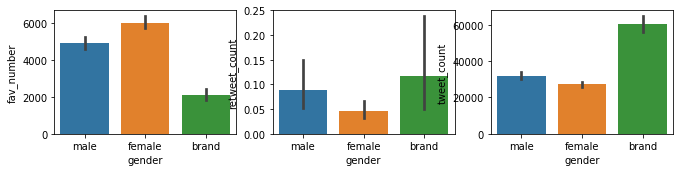

In [ ]:
plt.figure(figsize=(15,5))

for i,j in enumerate(['fav_number','retweet_count','tweet_count']):
    plt.subplot(2,4,i+1)
    sns.barplot (x = 'gender', y = j,data = df_datacopy)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


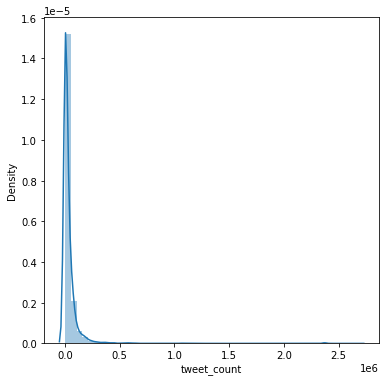

In [ ]:
plt.figure(figsize = (6,6))
sns.distplot(df_datacopy.tweet_count.dropna())

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

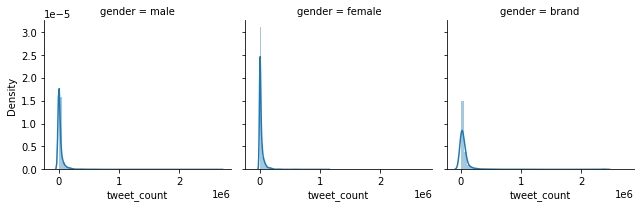

In [ ]:
# histogram of tweet count using facet to show histogram for different categories of gender

g = sns.FacetGrid(df_datacopy, col='gender')
g.map(sns.distplot, "tweet_count")
plt.show()

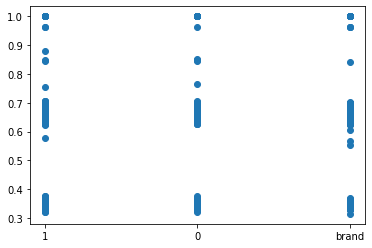

In [ ]:
plt.scatter(data["gender"],data["gender:confidence"])
plt.show()

In [ ]:
##Plotting based on text length
df_datacopy['txtlength'] = df_datacopy['text_Cleaned'].map(lambda text_Cleaned: len(text_Cleaned))

In [ ]:
df_datacopy.groupby('gender').describe()

gender:confidence                              ... txtlength                   
                   count      mean       std     min  ...       25%   50%   75%    max
gender                                                ...                             
brand             5942.0  0.868107  0.184168  0.3140  ...      41.0  59.0  76.0  128.0
female            6700.0  0.926360  0.155159  0.3223  ...      38.0  55.0  72.0  120.0
male              6194.0  0.905113  0.175139  0.3206  ...      42.0  61.0  78.0  120.0

[3 rows x 40 columns]

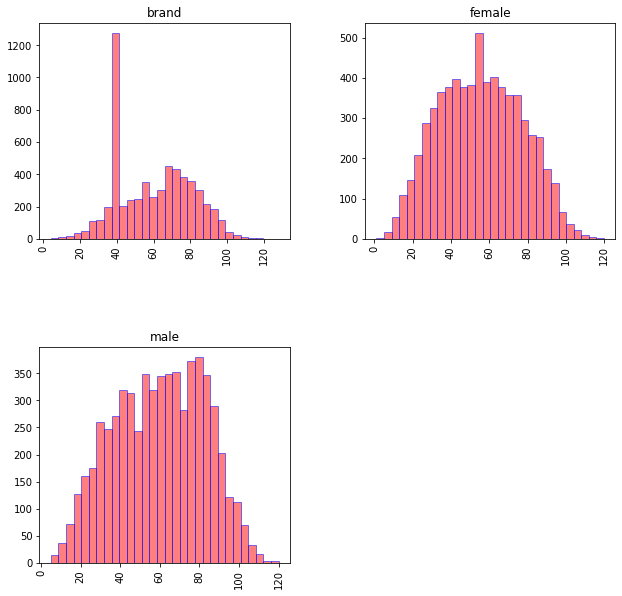

In [ ]:
df_datacopy.hist(column='txtlength', by='gender', bins=30, figsize=(10,10),facecolor='red', edgecolor='blue',alpha=0.5,density=False)
# n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)

plt.show()

**Statistics Using Link-Color and side color**

In [ ]:
def colorsGraphs(df, feature,  nbToRemove = 1):

    dfCol = df_datacopy.loc[:,[ 'gender', feature]] #Remove weird values : E+17...
    #dfColFiltered = dfCol[(dfCol['gender:confidence'] >= genderConfidence)&((dfCol[feature]).str.contains('E\+') != True)]   
    dfColFilteredMale = dfCol[dfCol['gender'] == 'male']
    dfColFilteredFemale = dfCol[dfCol['gender'] == 'female']
    dfColFilteredBrand = dfCol[dfCol['gender'] == 'brand']
    
    colorMale = dfColFilteredMale[feature]
    colorFemale = dfColFilteredFemale[feature]
    colorBrand = dfColFilteredBrand[feature]
    
    listMale = list(colorMale.values.flatten())
    listFemale = list(colorFemale.values.flatten())
    listBrand = list(colorBrand.values.flatten())
        
    nCommon = 30
    commonFemale = Counter(listFemale).most_common(nCommon)
    commonMale = Counter(listMale).most_common(nCommon)
    commonBrand = Counter(listBrand).most_common(nCommon)
    
    #print(commonBrand[0])
    del commonFemale[0:nbToRemove]
    del commonMale[0:nbToRemove]
    del commonBrand[0:nbToRemove]
    
    colorsFemale = [x[0] for x in commonFemale]
    colorsMale = [x[0] for x in commonMale]
    colorsBrand = [x[0] for x in commonBrand]
    
    colorsNumbFemale = [x[1] for x in commonFemale]
    colorsNumbMale = [x[1] for x in commonMale]
    colorsNumbBrand = [x[1] for x in commonBrand]
    
    colorsHexFemale = ['#' + x + '000000' for x in colorsFemale]
    colorsHexFemale = [x[0:7] for x in colorsHexFemale]
    colorsHexMale = ['#' + x + '000000' for x in colorsMale]
    colorsHexMale = [x[0:7] for x in colorsHexMale]
    colorsHexBrand = ['#' + x + '000000' for x in colorsBrand]
    colorsHexBrand = [x[0:7] for x in colorsHexBrand]
    
    rangeColFemale = list(range(len(colorsFemale)))
    rangeColMale = list(range(len(colorsMale)))
    rangeColBrand = list(range(len(colorsBrand)))
    
    fig1, ax1 = plt.subplots()
    
    bar_width = 0.5
    rects1 = plt.barh(rangeColFemale, colorsNumbFemale, bar_width, label = 'Female', color = colorsHexFemale)
    plt.yticks(rangeColFemale, colorsHexFemale)
    plt.xlabel('Color')
    plt.ylabel(feature)
    plt.title('Most used colors by Females for ' + feature + '\n' + str(nbToRemove) + ' most common occurences removed')
    plt.tight_layout()
    plt.show()
    
    fig2, ax2 = plt.subplots()
    
    bar_width = 0.5
    rects1 = plt.barh(rangeColMale, colorsNumbMale, bar_width, label = 'Male', color = colorsHexMale)
    plt.yticks(rangeColMale, colorsHexMale)
    plt.xlabel('Color')
    plt.ylabel(feature)
    plt.title('Most used colors by Males for ' + feature + '\n' + str(nbToRemove) + ' most common occurences removed')
    plt.tight_layout()
    plt.show()
    
    
    fig3, ax3 = plt.subplots()
    bar_width = 0.5
    rects1 = plt.barh(rangeColBrand, colorsNumbBrand, bar_width, label = 'Brand', color = colorsHexBrand)
    plt.yticks(rangeColBrand, colorsHexBrand)
    plt.xlabel('Color')
    plt.ylabel(feature)
    plt.title('Most used colors by Brands for ' + feature + '\n' + str(nbToRemove) + ' most common occurences removed')
    plt.tight_layout()
    plt.show()

In [ ]:
df_datacopy.head()

gender  ...  txtlength
0    male  ...         54
1    male  ...         54
2    male  ...         48
3    male  ...         67
4  female  ...         43

[5 rows x 10 columns]

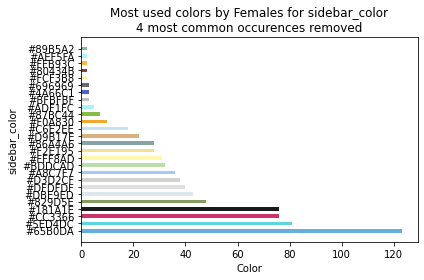

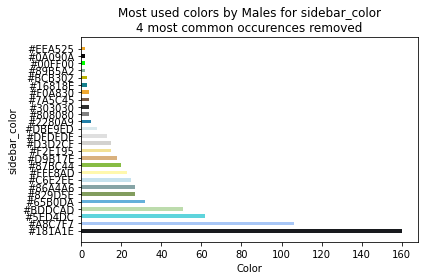

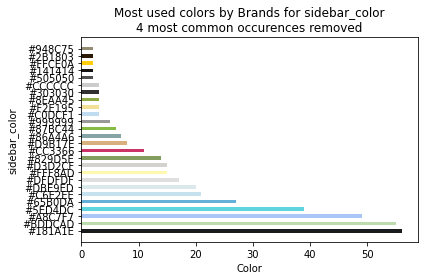

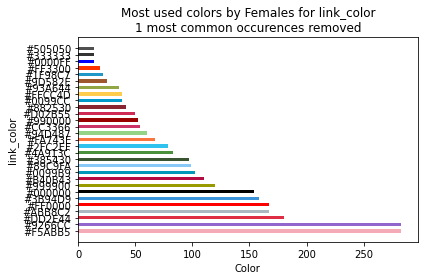

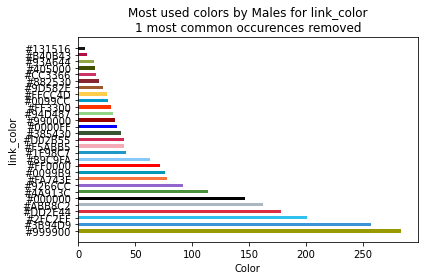

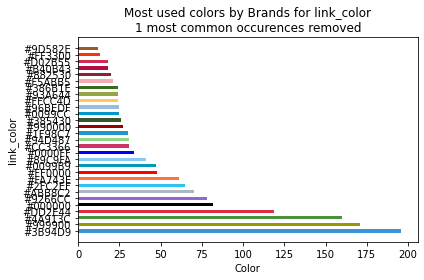

In [ ]:
#Data Exploration Colors
colorsGraphs(df_datacopy, 'sidebar_color',  4)
colorsGraphs(df_datacopy, 'link_color',  1)

Link color changed  more than their sidebar color.
Female users have indeed a preference for purple, pink and red colors, while male users tends to use more green and blue. 


**Word Cloud**

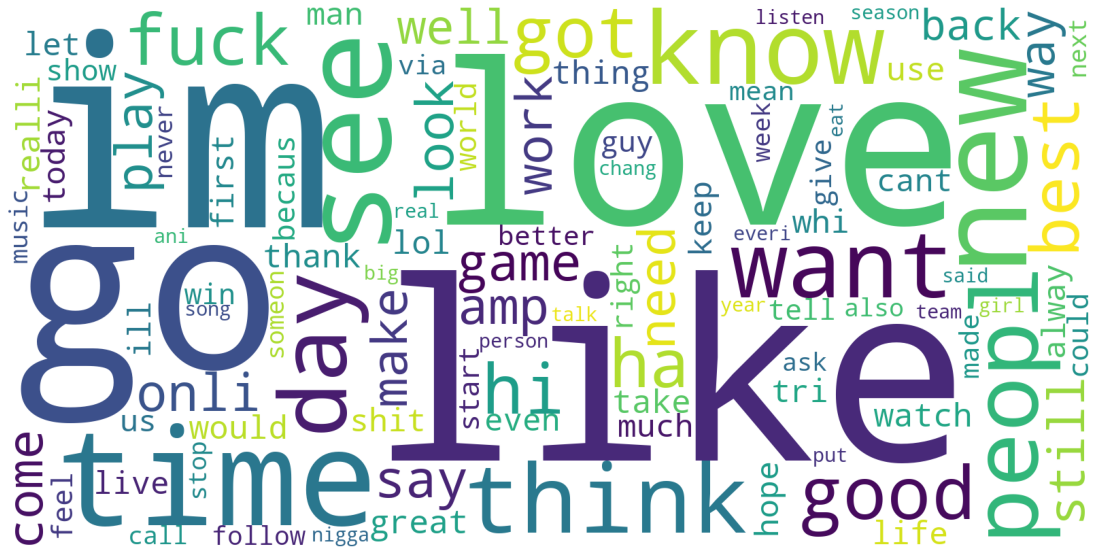

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
cloud = WordCloud(stopwords=["https", "t", "co","bacon","people","and","for","but","the","a","of","it","this","in","to","on","with","by","are","be","from","that","there","so","them","when","what","your","they","some","have","get","my","at","do","you","I","is","me","just","up","all","one","not","u","here","wa","as","was","he","an","out","can","about","thi"],width=1600, height=800,background_color="white", max_words=100)
#cloud= WordCloud(width=1600, height=800,background_color="black", max_words=50)
positive_cloud = cloud.generate(df_datacopy.loc[df_datacopy.gender == 'male', 'text_Cleaned'].str.cat(sep='\n'))

plt.figure(figsize=(20,10))
plt.imshow(positive_cloud)
plt.axis("off")
plt.show()

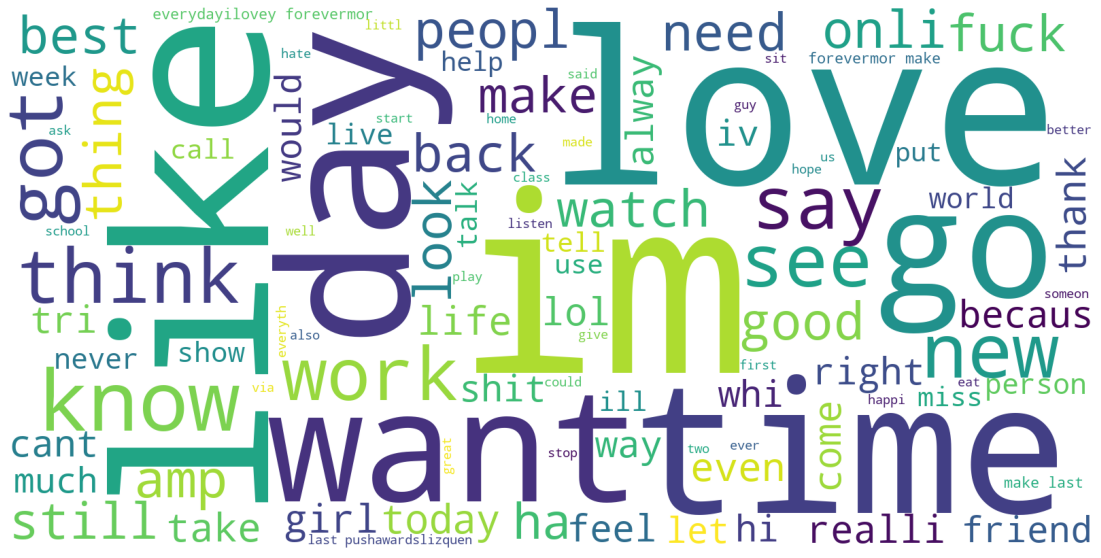

In [ ]:
cloud = WordCloud(stopwords=["https", "t", "co","bacon","people","and","for","but","the","a","of","it","this","in","to","on","with","by","are","be","from","that","there","so","them","when","what","your","they","some","have","get","my","at","do","you","I","is","me","just","up","all","one","not","u","here","wa","as","was","he","an","out","can","about","thi"],width=1600, height=800,background_color="white", max_words=100)
#cloud= WordCloud(width=1600, height=800,background_color="black", max_words=50)
positive_cloud = cloud.generate(df_datacopy.loc[df_datacopy.gender == 'female', 'text_Cleaned'].str.cat(sep='\n'))

plt.figure(figsize=(20,10))
plt.imshow(positive_cloud)
plt.axis("off")
plt.show()

# **Prediction based on link color(non text)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(data['gender'])
# split the dataset in train and test
X = data['text_Cleaned']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
def model_test(model,X_train,y_train,X_test,y_test, full_voc, displayResults = True, displayColors = False, featureIntent = 'text'):    
    switcher = {
      
        'link_color' : "theme color",
    }
    featureText =  switcher.get(featureIntent, '')
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    # compute MSE
    mse = metrics.mean_squared_error(y_test,y_pred)
    print('mse: {:.4f}'.format(mse))

    # Prints the accuracy of the gender prediction
    acc = model.score(X_test,y_test)
    print('score: ', acc)
    
    import matplotlib.pyplot as plt
    import sklearn
    conf = sklearn.metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(conf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.imshow(conf, cmap='binary', interpolation='None')
    plt.show()

    
    return model, acc


In [ ]:
def compute_bag_of_words(text):
    vectorizer = CountVectorizer()
    vectors = vectorizer.fit_transform(text)
    vocabulary = vectorizer.get_feature_names()
    return vectors, vocabulary

In [ ]:
def predictors(df, feature, model, modelname, displayResults = True, displayColors = False):
  print('Testing', modelname, 'model for gender prediction using', feature)
  full_bow, full_voc = compute_bag_of_words(df[feature])
  X = full_bow
  y = LabelEncoder().fit_transform(df['gender'])
#     # Create Training and testing sets.
  n,d = X.shape
  test_size = n // 5
  print('Split: {} testing and {} training samples'.format(test_size, y.size - test_size))
  perm = np.random.permutation(y.size)
  X_test  = X[perm[:test_size]]
  X_train = X[perm[test_size:]]
  y_test  = y[perm[:test_size]]
  y_train = y[perm[test_size:]]
  print('model: ', modelname)
  model, acc = model_test(model,X_train,y_train,X_test,y_test, full_voc, displayResults = displayResults, displayColors = displayColors, featureIntent = feature)
    
  return model, full_voc, acc

Testing Ridge Classifier model for gender prediction using link_color
Split: 3767 testing and 15069 training samples
model:  Ridge Classifier
mse: 1.2394
score:  0.4350942394478365


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


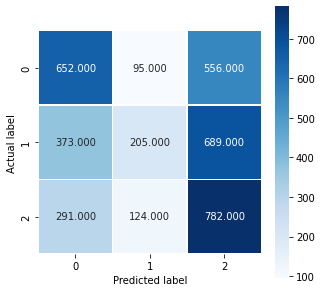

Testing SGD Classifier model for gender prediction using link_color
Split: 3767 testing and 15069 training samples
model:  SGD Classifier
mse: 1.4938
score:  0.3727103796124237


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


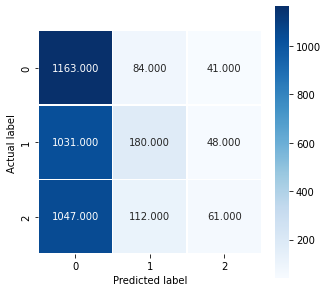

Testing Logistic regression model for gender prediction using link_color
Split: 3767 testing and 15069 training samples
model:  Logistic regression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase 

mse: 1.2225
score:  0.44889832758162995


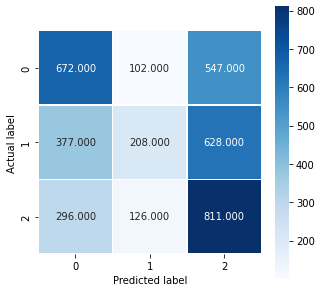

Testing Passive Aggressive Classifier model for gender prediction using link_color
Split: 3767 testing and 15069 training samples
model:  Passive Aggressive Classifier
mse: 0.8346
score:  0.3899654897796655


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


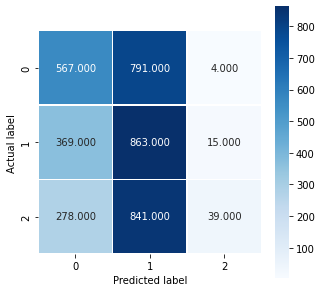

Testing Multinomial NB model for gender prediction using link_color
Split: 3767 testing and 15069 training samples
model:  Multinomial NB
mse: 1.2705
score:  0.44146535704804885


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


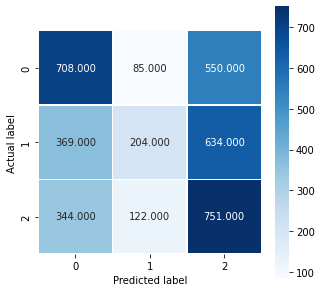

Testing Multi-layer Perceptron model for gender prediction using link_color
Split: 3767 testing and 15069 training samples
model:  Multi-layer Perceptron


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


mse: 1.2355
score:  0.4350942394478365


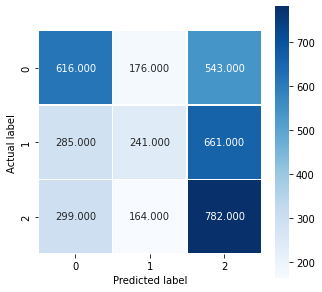

Testing RandomForestClassifier model for gender prediction using link_color
Split: 3767 testing and 15069 training samples
model:  RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


mse: 1.1558
score:  0.40164587204672153


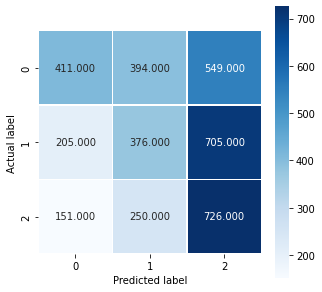

Testing SVC model for gender prediction using link_color
Split: 3767 testing and 15069 training samples
model:  SVC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


mse: 1.2264
score:  0.4393416511813114


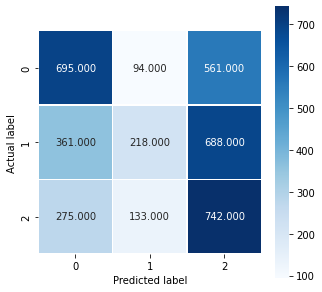

Testing KNN model for gender prediction using link_color
Split: 3767 testing and 15069 training samples
model:  KNN


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


mse: 1.2373
score:  0.3902309530130077


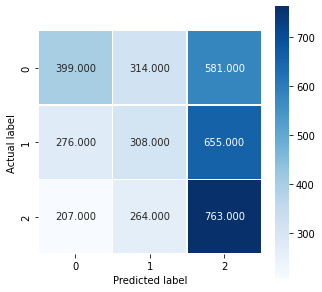

Testing adaBoost model for gender prediction using link_color
Split: 3767 testing and 15069 training samples
model:  adaBoost


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


mse: 1.2591
score:  0.432970533581099


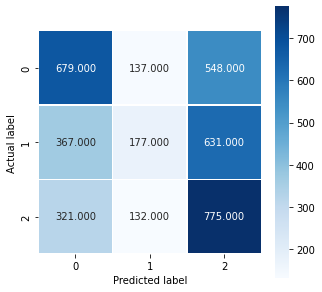

Win classifier:  0.44889832758162995 - Acc: 


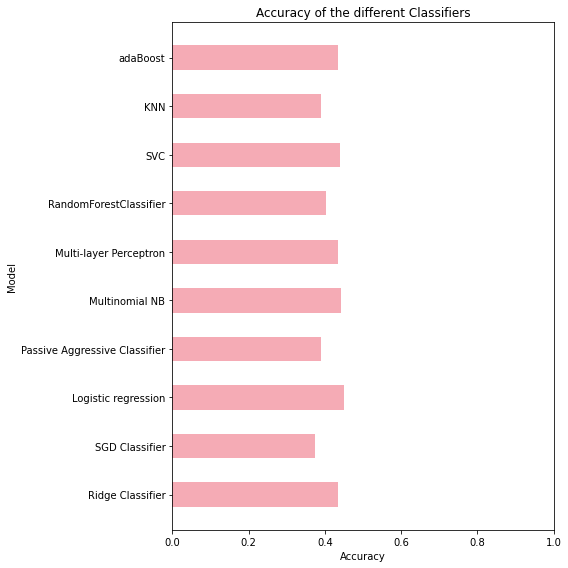

In [ ]:
# Classifier colors

#dataFrameColorFiltered = df_datacopy.loc[:,['gender', 'link_color']]
dataFrameColorFiltered = data.loc[:,['gender', 'link_color']]

feature = 'link_color'
df = dataFrameColorFiltered

# List of the classifiers we tested
modelListColor = [linear_model.RidgeClassifier(), 
             linear_model.SGDClassifier(),
             linear_model.LogisticRegression(multi_class='ovr', random_state=0),
             linear_model.PassiveAggressiveClassifier(),
             naive_bayes.MultinomialNB(),
             neural_network.MLPClassifier(),
            ensemble.RandomForestClassifier(n_estimators = 50, random_state=0),
            svm.SVC(kernel = 'rbf', probability=True),
            neighbors.KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto'),
            ensemble.AdaBoostClassifier()
               ]
modelNamesList = ['Ridge Classifier', 
                  'SGD Classifier',
                  'Logistic regression',
                  'Passive Aggressive Classifier',
                  'Multinomial NB',
                  'Multi-layer Perceptron',
                  'RandomForestClassifier',
                  'SVC',
                  'KNN',
                  'adaBoost'
                  ]
acc_color = np.zeros(len(modelListColor))
for i in range(0, len(modelListColor)):

#for i in range(2,3):
# model_color = modelListColor[i]
    modelName = modelNamesList[i]
    modelListColor[i], voc_color, acc_color[i] = predictors(df, feature, modelListColor[i], modelName, displayResults = False, displayColors=True)
#print(modelListColor, voc_color, acc_color)
win_clf = max(acc_color)
print("Win classifier: ", win_clf, "- Acc: ")
fig, ax1 = plt.subplots(figsize=(8,8))
ax1.set_xlim([0, 1])
bar_width = 0.5
#plt.figure(figsize=(8,8))
model_number = np.arange(len(modelListColor))+1
# print(acc_color)
# acc_color_sort = acc_color.sort()
# print('######')
# print(acc_color)
#y_pos = np.arange(len(model_number))
rects1 = plt.barh(model_number,acc_color, bar_width, label = 'Brand Predictors',color = '#f5abb5')
plt.yticks(model_number,modelNamesList)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of the different Classifiers')
plt.tight_layout()
plt.show()



**All the models gives more or less same accuracy:- 40% - 50%**

# **Prediction based on text**

In [ ]:
data.head

<bound method NDFrame.head of       gender  ...                                       text_Cleaned
0          1  ...  robbi respond critic win eddi edward worldtitl...
1          1  ...  it felt like friend wa live stori them   retir...
2          1  ...   absolut ador loui start song hit hard feel good 
3          1  ...  hi jordanspieth look url use ifttt typic see a...
4          0  ...        watch neighbour sky catch neighbs xxx  xxx 
...      ...  ...                                                ...
20045      0  ...     lookupondeath fine ill drink tea too love you 
20046      1  ...  greg hardi good player get face dez bryant lea...
20047      1  ...                   miss peopl still never want see 
20048      0  ...  bitemyapp notic tendenc pee carpet want say an...
20049      0  ...  think apush creativ project im go bring bacon ...

[18836 rows x 9 columns]>

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(data['gender'])

# split the dataset in train and test
X = data['text_Cleaned']
# Stratify will create a train set with the same class balance than the original set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
def classification_modeling(X_train, X_test, y_train, y_test, text_feature=False):
    """
    This function iterates different possible models
    and return corresponding accuracy
    
    Args:
        text_feature: Whether the model handles text features or not
    
    Return: The best fitted model
    """
    clf_dict = {'lr': linear_model.LogisticRegression(multi_class='ovr', random_state=0),
                 'rf': ensemble.RandomForestClassifier(n_estimators = 50, random_state=0),
             'svm': SVC(kernel = 'rbf', probability=True),
                  'nb': ComplementNB(),
                'ridge': linear_model.RidgeClassifier(), 
               'sgd' :linear_model.SGDClassifier(),
              'passaggre':linear_model.PassiveAggressiveClassifier(),
               'NB':naive_bayes.MultinomialNB(),
             'NN':neural_network.MLPClassifier(),
             'Knn': neighbors.KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto'),
             'Adaboost':ensemble.AdaBoostClassifier()
               }
    result_dict = dict.fromkeys(clf_dict, None)
    pred_dict = dict.fromkeys(clf_dict, None)

    modelNamesList = [
                 'LogisticRegression',
                 'RandomForestClassifier',
                 'SVM',
                  'ComplementNB',
                 'RidgeClassifier', 
              'SGDClassifier',
               'PassiveAggressiveClassifier',
               'MultinomialNB',
             'MLPClassifier',
             'KNN',
             'Adaboost'
                  
                  ]
    acc_color = np.zeros(len(modelListColor))

    
    acc_val=[]
    for clf_key in clf_dict:
        if text_feature == True:
            tfidf = TfidfVectorizer()
            clf = Pipeline([('vect', tfidf),
                            ('clf', clf_dict[clf_key])])
        else:
            clf = clf_dict[clf_key]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        acc = accuracy_score(y_test,predictions)
        result_dict[clf_key] = acc
        pred_dict[clf_key] = predictions
        print('Fitting ' + clf_key + ' - Acc:', acc)
        acc_val.append(acc);
    


        import matplotlib.pyplot as plt
        import sklearn
        conf = sklearn.metrics.confusion_matrix(y_test,predictions)
        plt.figure(figsize=(5,5))
        sns.heatmap(conf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'icefire');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        plt.imshow(conf, cmap='binary', interpolation='None')
        plt.show()
        #print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
        #print('-'*40)
        #print(acc_val)
        
    win_clf = max(result_dict, key=lambda key: result_dict[key])
    print("Win classifier: ", win_clf, "- Acc: ",result_dict[win_clf])
    fig, ax1 = plt.subplots(figsize=(8,8))
    ax1.set_xlim([0, 1])
    #bar_width = 0.5
#plt.figure(figsize=(8,8))
    model_number = np.arange(len(modelNamesList))+1
    rects1 = plt.barh(model_number, acc_val,color = '#D95319')
    plt.yticks(model_number,modelNamesList)
    plt.xlabel('Accuracy with text')
    plt.ylabel('Model')
    plt.title('Accuracy of the different Classifiers')
    plt.tight_layout()
    plt.show()
    return np.asarray(pred_dict[win_clf])

Fitting lr - Acc: 0.525747655282251


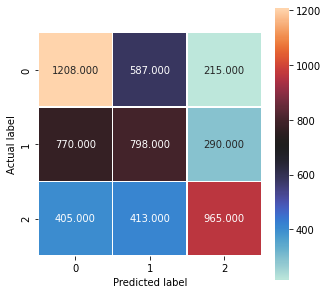

Fitting rf - Acc: 0.5121217483631215


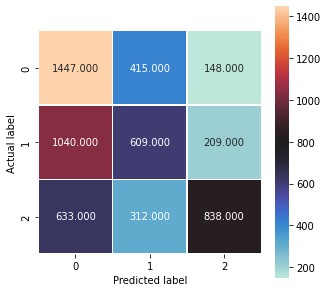

Fitting svm - Acc: 0.5388426827110246


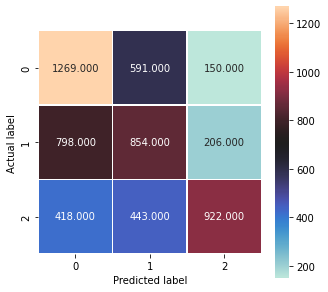

Fitting nb - Acc: 0.5262785347726067


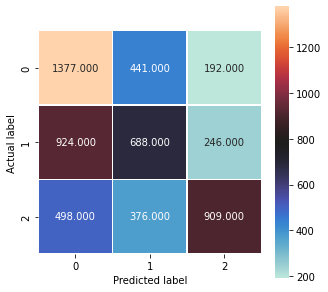

Fitting ridge - Acc: 0.518846221907627


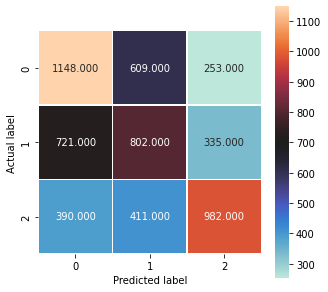

Fitting sgd - Acc: 0.533003008317112


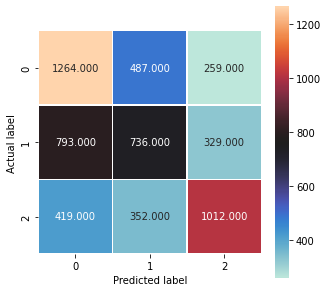

Fitting passaggre - Acc: 0.4781454609803575


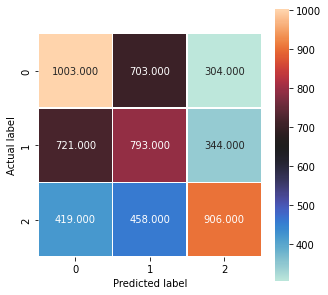

Fitting NB - Acc: 0.520438860378694


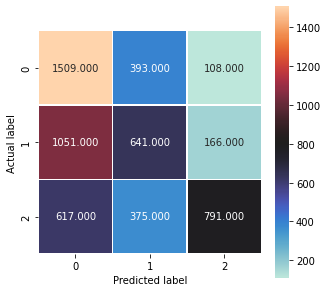

Fitting NN - Acc: 0.4769067421695275


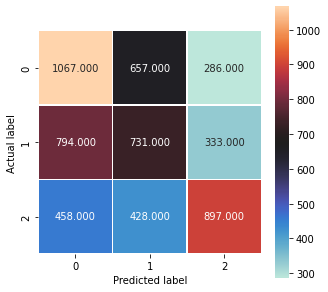

Fitting Knn - Acc: 0.4631038754202796


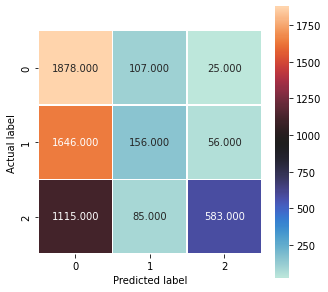

Fitting Adaboost - Acc: 0.44983188816138736


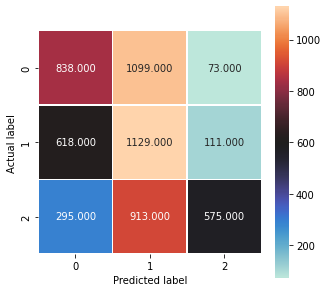

Win classifier:  svm - Acc:  0.5388426827110246


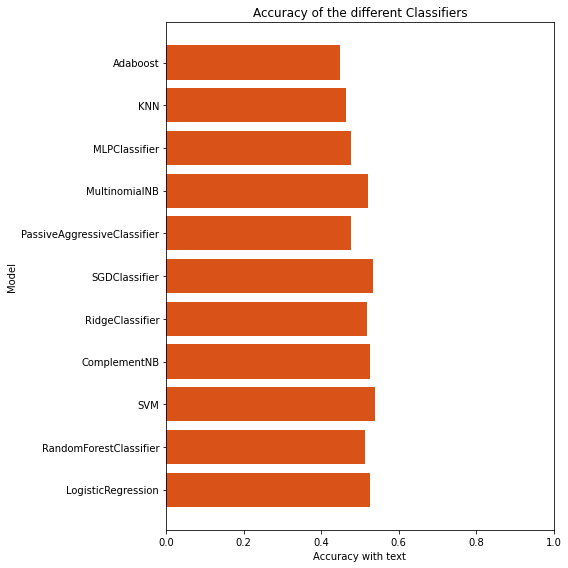

In [ ]:
best_text_preds = classification_modeling(X_train, X_test, y_train, y_test, text_feature=True)

**Predicitions using text is better than using link-colors but still it is between 50%-55%**

# **Predictions using text + description**

In [ ]:
data['text_description'] = data['text_Cleaned'].str.cat(data['description'], sep=' ')

In [ ]:
from sklearn import linear_model, ensemble, naive_bayes, neural_network, neighbors
X = data['text_description']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#In the code line above, stratify will create a train set with the same class balance than the original set

X_train.head()
X_train.isnull().values.any() # Check if any null values, True if there is at least one.

False

Fitting lr - Acc: 0.6182976464342594


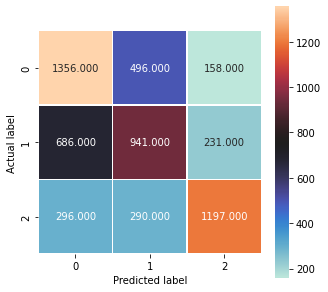

Fitting rf - Acc: 0.5949389488586091


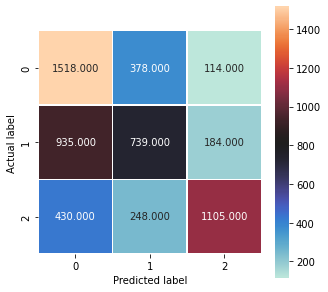

Fitting svm - Acc: 0.6269686781100691


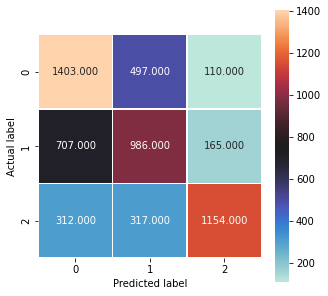

Fitting nb - Acc: 0.6205981242258007


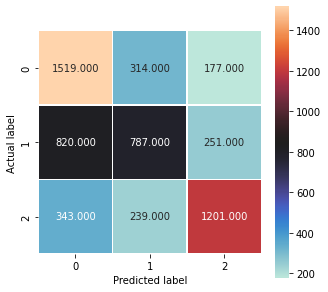

Fitting ridge - Acc: 0.6181206866041409


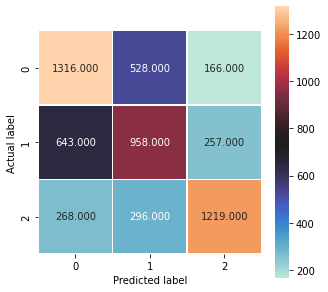

Fitting sgd - Acc: 0.6170589276234295


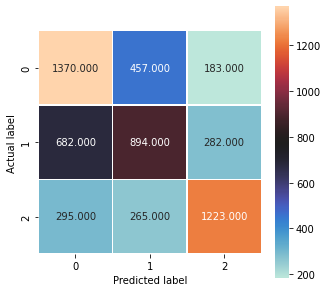

Fitting passaggre - Acc: 0.579189523978057


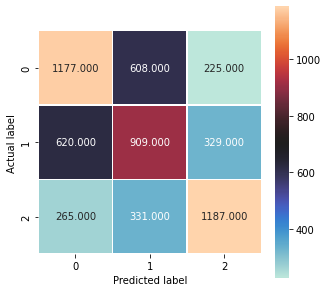

Fitting NB - Acc: 0.6144045301716511


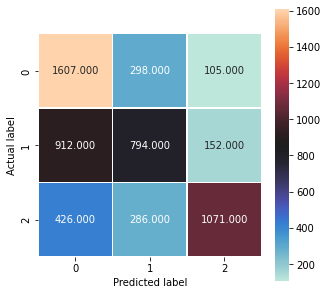

Fitting NN - Acc: 0.5802512829587684


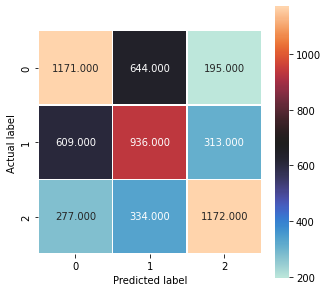

Fitting Knn - Acc: 0.5186692620775084


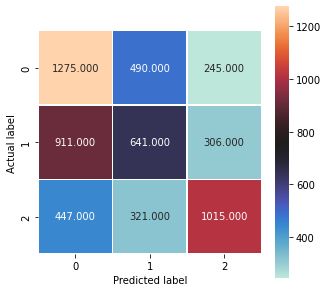

Fitting Adaboost - Acc: 0.5252167757918952


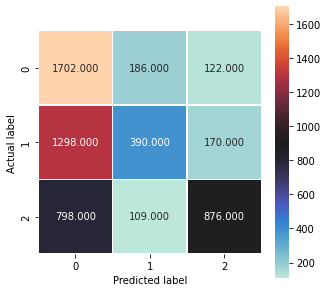

Win classifier:  svm - Acc:  0.6269686781100691


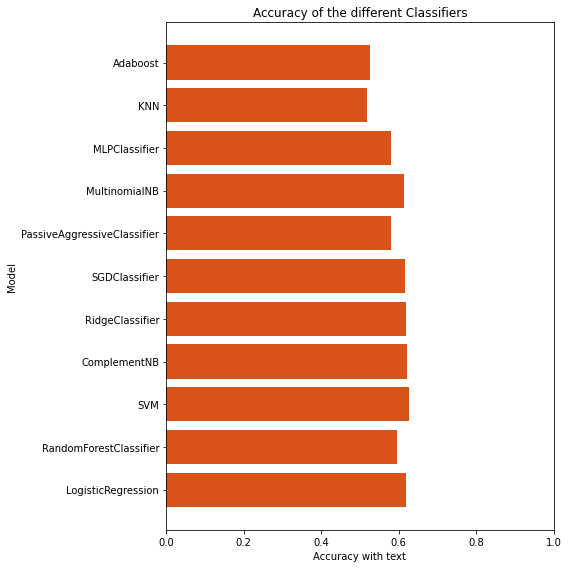

In [ ]:
best_text_preds = classification_modeling(X_train, X_test, y_train, y_test, text_feature=True)


using text and description gives us good accuracy 

# **LGBM Classifier**

In [ ]:
cv = CountVectorizer(max_features = 500)
x = cv.fit_transform(data['description']).toarray()
x1=cv.fit_transform(data['text_Cleaned']).toarray()

In [ ]:
A=pd.DataFrame(x)

B=pd.DataFrame(x1)

In [ ]:
X=pd.concat([B,A],join='outer',axis=1)
X.shape

(18836, 1000)

In [ ]:
x= np.array(X)
y = np.array(data['gender'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [ ]:
lgbmodel = LGBMClassifier(max_depth=5)
lgbmodel.fit(X_train, y_train)
y_pred_lgbm = lgbmodel.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("Accuracy:%.2f%%" %(accuracy_lgbm * 100.0))

Accuracy:56.71%
